In [1]:
%pip install -U opperai

Note: you may need to restart the kernel to use updated packages.


# Function caching

Caching is a great way to dramatically reduce costs and latency for many LLM applications. Opper supports both exact and semantic caching 

In [1]:
from opperai import fn
# import os

# os.environ["OPPER_API_KEY"] = "your-api-key"

Let's define a simple function that will reply to user questions

In [7]:
@fn(model="openai/gpt-4o" )
async def reply(question:str) -> str:
    """Answers user questions"""

In [8]:
await reply("What is the capital of France?")

'The capital of France is Paris.'

It took 1.4s for the model to send a response.

## Exact caching

Now, let's suppose we don't want to regenerate another response when the same exact user query comes in. We can define the `cache_config` on the function and enable exact match caching with a short TTL of 10s (that means that responses will be cached for up to 10 seconds)


In [9]:
from opperai.types import CacheConfiguration

In [11]:
@fn(model="openai/gpt-4o", cache_config=CacheConfiguration(exact_match_cache_ttl=10))
async def reply(question: str) -> str:
    """Answers user questions"""

In [12]:
await reply("What is the capital of France?")

'The capital of France is Paris.'

This is a new function, so the first call calls the OpenAI model directly

In [13]:
await reply("What is the capital of France?")

'The capital of France is Paris.'

If we run again the same call (within our 10s TTL), Opper returns the cached response. That is both much faster and cheaper.


## Semantic caching

Now, let's assume we'd like our caching to be slightly smarter than exact match caching and catch all questions that are very similar.

In [14]:
await reply("What's the capital of France")

'The capital of France is Paris.'

This question is the same as the previous one, but it's phrased differently, so we don't hit our cache. Let's enable semantic caching to catch such inputs.

In [19]:
@fn(model="openai/gpt-4o", cache_config=CacheConfiguration(exact_match_cache_ttl=10, semantic_cache_ttl=60, semantic_cache_threshold=0.1))
async def reply(question: str) -> str:
    """Answers user questions"""

The `semantic_cache_threshold` value represents the difference between the cosine similarity of the cached input and the incoming query. Its value will heavily depend on what kind of application it is used for, but we can start with 0.1 to match very similar inputs.

In [20]:
await reply("What's the capital of France")

'The capital of France is Paris.'

In [21]:
await reply("What's the capital of France?")

'The capital of France is Paris.'

This second call returned faster and was cached, as we can see it in the traces view of Opper.




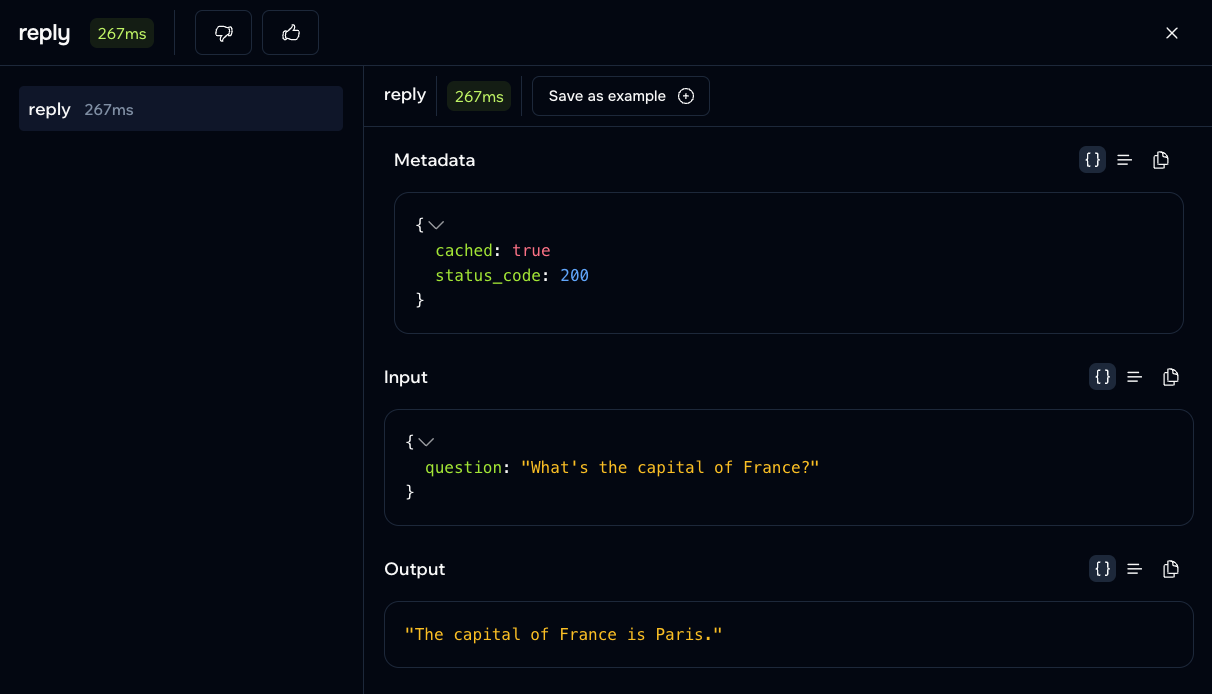

In [22]:
from IPython.display import Image

Image(filename="cached_response.png")